
Gossip <br> 
Copyright (C) Matthew Love 2024 (gossipsampling@gmail.com)

This program is free software: you can redistribute it and/or modify
it under the terms of the GNU General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU General Public License for more details.

You should have received a copy of the GNU General Public License
along with this program.  If not, see <http://www.gnu.org/licenses/>.


In [1]:
import gossip
import time

## A Brief Overview
The below walks throught the experimnetal result presented in 'Gossip-base Peer Sampling' by Mark Jelastity, Spyros Voulgaris, Rachid Guerraoui, Adde-Marie Kermarrec, and Maarten Van Steen. With the idea being to compare Gossip's experimental results with the literature it's based off of. 
<br><br>
The implemented simulation software uses the real PeerSamplingService which inturn uses the real networking stack and creates at least 2 threads per node. This causes resources to run out quickly. Possible ways to improve this would be to create a full simulation node where the view does not talk to the gRPC library and instead uses some fabricated transport layer, use a cool network simulator like [Shadow](https://shadow.github.io/docs/guide/design_2x.html) (I need to look more into this), or some other solution that I am unaware of currently.

All and all this is a first pass at simulating this, but is good enough to verify statistical behavior of the network.

### Common Node Types

The common node types are the different combinations of the below options:
- Push vs PushPull
- Healer vs Swapper vs Blind
    - Healer: `healing = size / 2` and `swap = 0`
    - Swapper: `swap = swap / 2` and `healing = 0`\
    - Blind: `healing = 0` and `swap = 0`
- Tail vs Rand
    - Tail: select the last `NodeDescriptor` in the `View`
    - Rand: select a `NodeDescriptor` in the `View` using a uniform random distibution

A few variations of will be needed in some simulations; however, this covers most.

In [2]:
# A Simple Function for all of our simulated nodes to run
def simple_func(pss, view, log, stop_event):
    while(True):
        if stop_event.is_set():
            return

        time.sleep(1)

In [3]:
# These classes of nodes represent the majority of all nodes that will be tested

rand_healer_push = gossip.NodeSchema(name="RandHealerPush", push=True, pull=False, wait_time=1, timeout=20, func=simple_func, 
                                     view_type=gossip.URView, selector_type=gossip.SelectorType.LOGGED_UNIFORM_RANDOM, size=20, healing=10, swap=0)

rand_swapper_push = gossip.NodeSchema(name="RandSwapPush", push=True, pull=False, wait_time=1, timeout=20, func=simple_func, 
                                      view_type=gossip.URView, selector_type=gossip.SelectorType.LOGGED_UNIFORM_RANDOM, size=20, healing=0, swap=10)

rand_blind_push = gossip.NodeSchema(name="RandBlindPush", push=True, pull=False, wait_time=1, timeout=20, func=simple_func, 
                                    view_type=gossip.URView, selector_type=gossip.SelectorType.LOGGED_UNIFORM_RANDOM, size=20, healing=0, swap=0)

tail_healer_push = gossip.NodeSchema(name="TailHealerPush", push=True, pull=False, wait_time=1, timeout=20, func=simple_func, 
                                     view_type=gossip.URView, selector_type=gossip.SelectorType.LOGGED_TAIL, size=20, healing=10, swap=0)

tail_swapper_push = gossip.NodeSchema(name="TailSwapPush", push=True, pull=False, wait_time=1, timeout=20, func=simple_func, 
                                      view_type=gossip.URView, selector_type=gossip.SelectorType.LOGGED_TAIL, size=20, healing=0, swap=10)

tail_blind_push = gossip.NodeSchema(name="TailSwapPush", push=True, pull=False, wait_time=1, timeout=20, func=simple_func, 
                                    view_type=gossip.URView, selector_type=gossip.SelectorType.LOGGED_TAIL, size=20, healing=0, swap=0)

rand_healer_push_pull = gossip.NodeSchema(name="RandHealerPushPull", push=True, pull=True, wait_time=1, timeout=20, func=simple_func, 
                                     view_type=gossip.URView, selector_type=gossip.SelectorType.LOGGED_UNIFORM_RANDOM, size=20, healing=10, swap=0)

rand_swapper_push_pull = gossip.NodeSchema(name="RandSwapPushPull", push=True, pull=True, wait_time=1, timeout=20, func=simple_func, 
                                      view_type=gossip.URView, selector_type=gossip.SelectorType.LOGGED_UNIFORM_RANDOM, size=20, healing=0, swap=10)

rand_blind_push_pull = gossip.NodeSchema(name="RandBlindPushPull", push=True, pull=True, wait_time=1, timeout=20, func=simple_func, 
                                    view_type=gossip.URView, selector_type=gossip.SelectorType.LOGGED_UNIFORM_RANDOM, size=20, healing=0, swap=0)

tail_healer_push_pull = gossip.NodeSchema(name="TailHealerPushPull", push=True, pull=True, wait_time=1, timeout=20, func=simple_func, 
                                     view_type=gossip.URView, selector_type=gossip.SelectorType.LOGGED_TAIL, size=20, healing=10, swap=0)

tail_swapper_push_pull = gossip.NodeSchema(name="TailSwapPushPull", push=True, pull=True, wait_time=1, timeout=20, func=simple_func, 
                                      view_type=gossip.URView, selector_type=gossip.SelectorType.LOGGED_TAIL, size=20, healing=0, swap=10)

tail_blind_push_pull = gossip.NodeSchema(name="TailSwapPushPull", push=True, pull=True, wait_time=1, timeout=20, func=simple_func, 
                                    view_type=gossip.URView, selector_type=gossip.SelectorType.LOGGED_TAIL, size=20, healing=0, swap=0)

schema_registry = {
    rand_healer_push.name: rand_healer_push,
    rand_swapper_push.name: rand_swapper_push,
    rand_blind_push.name: rand_blind_push,
    tail_healer_push.name: tail_healer_push,
    tail_swapper_push.name: tail_swapper_push,
    tail_blind_push.name: tail_blind_push,
    rand_healer_push_pull.name: rand_healer_push_pull,
    rand_swapper_push_pull.name: rand_swapper_push_pull,
    rand_blind_push_pull.name: rand_blind_push_pull,
    tail_healer_push_pull.name: tail_healer_push_pull,
    tail_swapper_push_pull.name: tail_swapper_push_pull,
    tail_blind_push_pull.name: tail_blind_push_pull
}

all_list = [rand_healer_push_pull, rand_swapper_push_pull,
                  rand_blind_push_pull, tail_healer_push_pull, 
                  tail_swapper_push_pull, tail_blind_push_pull,
                  rand_healer_push, rand_swapper_push, 
                  rand_blind_push, tail_healer_push,
                  tail_swapper_push, tail_blind_push]

push_list = [rand_healer_push, rand_swapper_push, rand_blind_push, tail_healer_push, tail_swapper_push, tail_blind_push]

push_pull_list = [rand_healer_push_pull, rand_swapper_push_pull, rand_blind_push_pull, tail_healer_push_pull, tail_swapper_push_pull, tail_blind_push_pull]

### The 3 Network Topology Construction Methods



#### Growing
- Initially only contains 1 Entry Node
- At the beggining of each cycle 500 new nodes added for 20 cycles (scaled to 20 per sec to not crash my computer)
- Run for as long as desired after network is constructed 

In [4]:
def growing_topology(node_type: gossip.NodeSchema, run_time_after_creation: int, sim_name: str, stats_interval: int=2000):
    name = f"{sim_name}_{node_type.name}"
    sim = gossip.Simulator(schema=schema_registry, name=name,
                           events=[
                               gossip.AddEntryServers(entry_nodes={node_type.name: 1}),
                               gossip.AddRate(add_rates={node_type.name: (10, 1)}, run_time=50),
                               gossip.AddDelay(delay_time=run_time_after_creation)
                           ])
    sim.run(stats_interval=stats_interval)

#### Running the Simulation

In [5]:
for node_type in all_list:
    print(f"Starting Sim: {node_type.name}.")
    growing_topology(node_type=node_type, run_time_after_creation=300, sim_name="growing", stats_interval=2000)
    print("-----------------------------------------------")

Starting Delay with 1 entry nodes and 480 nodes at time 51.
Entering Stop
Simulation finished in 351 seconds.
Finished Calculating Statistics for the Simulation Run
-----------------------------------------------
Starting Sim: RandSwapPushPull.
Starting AddEntryServers with 0 entry nodes and 0 nodes at time 0.
Starting AddRate with 1 entry nodes and 0 nodes at time 0.
Starting Delay with 1 entry nodes and 480 nodes at time 51.
Entering Stop
Simulation finished in 351 seconds.
Finished Calculating Statistics for the Simulation Run
-----------------------------------------------
Starting Sim: RandBlindPushPull.
Starting AddEntryServers with 0 entry nodes and 0 nodes at time 0.
Starting AddRate with 1 entry nodes and 0 nodes at time 0.
Starting Delay with 1 entry nodes and 480 nodes at time 51.
Entering Stop
Simulation finished in 351 seconds.
Finished Calculating Statistics for the Simulation Run
-----------------------------------------------
Starting Sim: TailHealerPushPull.
Starting A

#### Lattice
- Nodes Start in a Ring Structure

In [7]:
def lattice_topology(node_type: gossip.NodeSchema, size: int, run_time_after_creation: int, sim_name: str, stats_interval: int=2000):
    name = f"{sim_name}_{node_type.name}"
    sim = gossip.Simulator(schema=schema_registry, name=name,
                           events=[
                               gossip.AddLattice(nodes={node_type.name: size}, use_entry=False),
                               gossip.AddDelay(delay_time=run_time_after_creation)
                           ])
    sim.run(stats_interval=stats_interval)

#### Running the Simulation

In [8]:
for node_type in all_list:
    print(f"Starting Sim: {node_type.name}.")
    lattice_topology(node_type=node_type, size=500, run_time_after_creation=300, sim_name="lattice", stats_interval=2000)
    print("-----------------------------------------------")

Starting Sim: RandHealerPushPull.
Starting AddLattice with 0 entry nodes and 0 nodes at time 0.
Starting Delay with 0 entry nodes and 500 nodes at time 0.
Entering Stop
Simulation finished in 301 seconds.
Finished Calculating Statistics for the Simulation Run
-----------------------------------------------
Starting Sim: RandSwapPushPull.
Starting AddLattice with 0 entry nodes and 0 nodes at time 0.
Starting Delay with 0 entry nodes and 500 nodes at time 0.
Entering Stop
Simulation finished in 300 seconds.
Finished Calculating Statistics for the Simulation Run
-----------------------------------------------
Starting Sim: RandBlindPushPull.
Starting AddLattice with 0 entry nodes and 0 nodes at time 0.
Starting Delay with 0 entry nodes and 500 nodes at time 0.
Entering Stop
Simulation finished in 300 seconds.
Finished Calculating Statistics for the Simulation Run
-----------------------------------------------
Starting Sim: TailHealerPushPull.
Starting AddLattice with 0 entry nodes and 0 

#### Random
- The initial topology is random
- In this simulation a Erdos Renyi process is used to construct the intial graph

In [9]:
def random_topology(node_type: gossip.NodeSchema, size: int, num_edges: int, run_time_after_creation: int, sim_name: str, stats_interval: int=2000):
    name = f"{sim_name}_{node_type.name}"
    sim = gossip.Simulator(schema=schema_registry, name=name,
                           events=[
                               gossip.AddUniformRandom(nodes={node_type.name: size}, num_edges=num_edges, use_entry=False),
                               gossip.AddDelay(delay_time=run_time_after_creation)
                           ])
    sim.run(stats_interval=stats_interval)

#### Running the Simulation

In [11]:
for node_type in all_list:
    print(f"Starting Sim: {node_type.name}.")
    random_topology(node_type=node_type, size=500, num_edges=20, run_time_after_creation=300, sim_name="random", stats_interval=2000)
    print("-----------------------------------------------")

Starting Sim: RandHealerPushPull.
Starting AddUniformRandom with 0 entry nodes and 0 nodes at time 0.
Starting Delay with 0 entry nodes and 500 nodes at time 1.
Entering Stop
Simulation finished in 301 seconds.
Finished Calculating Statistics for the Simulation Run
-----------------------------------------------
Starting Sim: RandSwapPushPull.
Starting AddUniformRandom with 0 entry nodes and 0 nodes at time 0.
Starting Delay with 0 entry nodes and 500 nodes at time 0.
Entering Stop
Simulation finished in 300 seconds.
Finished Calculating Statistics for the Simulation Run
-----------------------------------------------
Starting Sim: RandBlindPushPull.
Starting AddUniformRandom with 0 entry nodes and 0 nodes at time 0.
Starting Delay with 0 entry nodes and 500 nodes at time 1.
Entering Stop
Simulation finished in 301 seconds.
Finished Calculating Statistics for the Simulation Run
-----------------------------------------------
Starting Sim: TailHealerPushPull.
Starting AddUniformRandom w

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import glob

In [17]:
# Find all directories starting with "growing"
growing_dirs = glob.glob('sim_logs/growing*/')

In [18]:
growing_dirs

['sim_logs/growing_RandSwapPushPull/',
 'sim_logs/growing_TailHealerPush/',
 'sim_logs/growing_RandHealerPush/',
 'sim_logs/growing_TailSwapPushPull/',
 'sim_logs/growing_RandSwapPush/',
 'sim_logs/growing_RandHealerPushPull/',
 'sim_logs/growing_TailSwapPush/',
 'sim_logs/growing_TailHealerPushPull/',
 'sim_logs/growing_RandBlindPush/',
 'sim_logs/growing_RandBlindPushPull/']

In [19]:
plot_data = []
for dir_path in growing_dirs:
    stats_file = Path(dir_path) / 'network_stats.csv'
    print(stats_file)
    if stats_file.exists():
        # Read the CSV
        df = pd.read_csv(stats_file)
        
        # Get label by removing 'growing' prefix from directory name
        label = Path(dir_path).name.replace('growing', '').rstrip('/')
        
        plot_data.append((df, label))

sim_logs/growing_RandSwapPushPull/network_stats.csv
sim_logs/growing_TailHealerPush/network_stats.csv
sim_logs/growing_RandHealerPush/network_stats.csv
sim_logs/growing_TailSwapPushPull/network_stats.csv
sim_logs/growing_RandSwapPush/network_stats.csv
sim_logs/growing_RandHealerPushPull/network_stats.csv
sim_logs/growing_TailSwapPush/network_stats.csv
sim_logs/growing_TailHealerPushPull/network_stats.csv
sim_logs/growing_RandBlindPush/network_stats.csv
sim_logs/growing_RandBlindPushPull/network_stats.csv


/tmp/ipykernel_593721/670643488.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


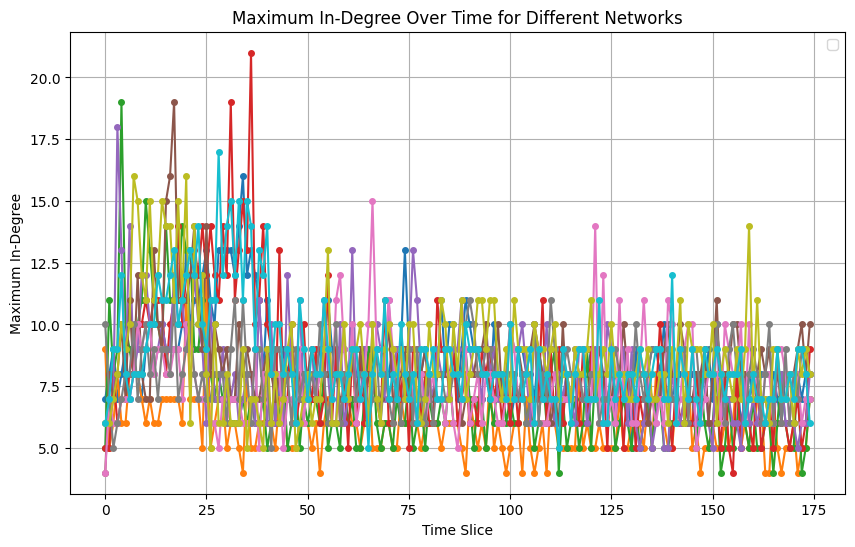

In [21]:
# Create the plot
plt.figure(figsize=(10, 6))

# Plot each dataset
for df, label in plot_data:
    plt.plot(df['time_slice'], df['max_in_degree'], label=label, marker='o', markersize=4)

# Customize the plot
plt.xlabel('Time Slice')
plt.ylabel('Maximum In-Degree')
plt.title('Maximum In-Degree Over Time for Different Networks')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

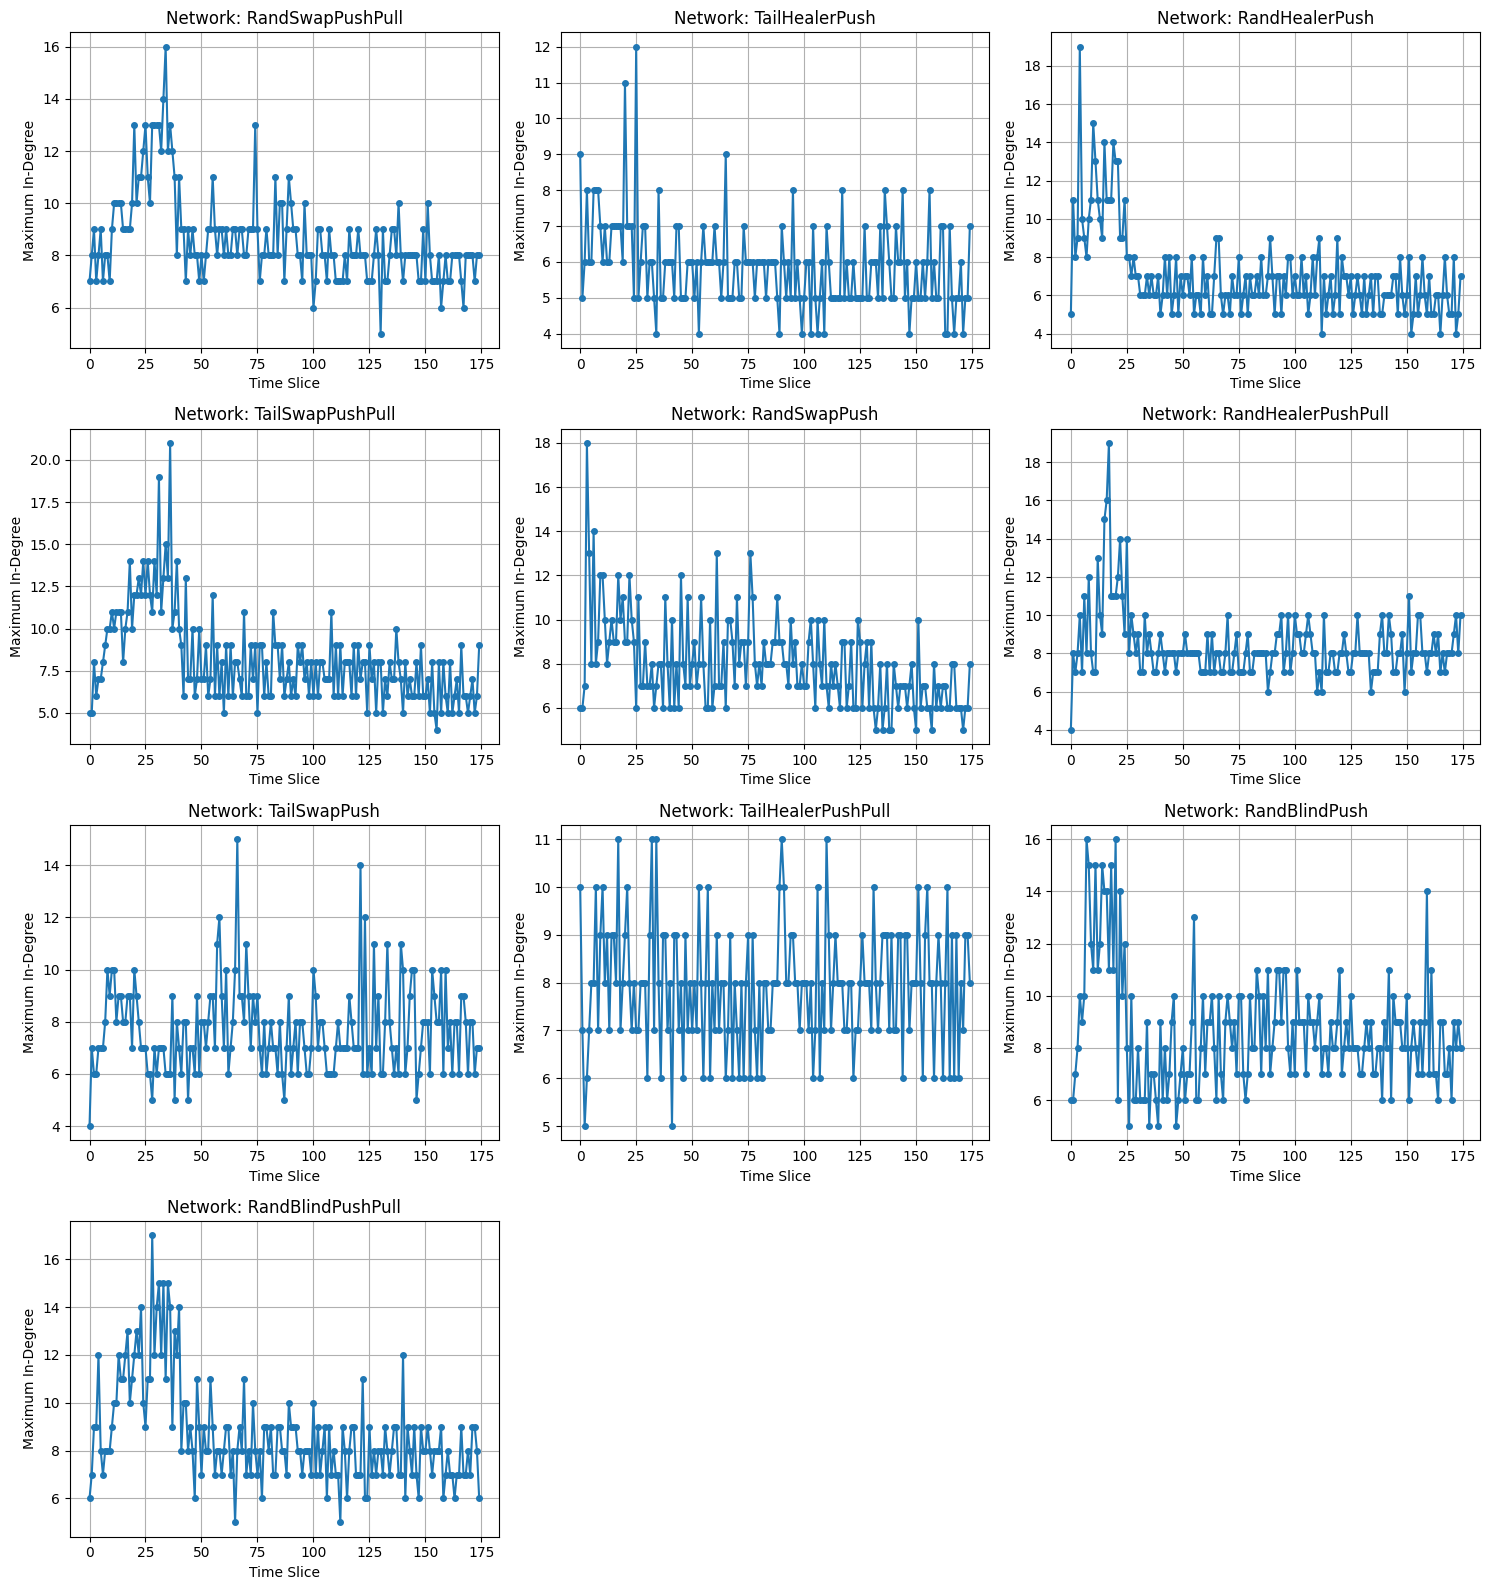

In [23]:
# Calculate grid dimensions based on number of plots
n_plots = len(plot_data)
n_cols = min(3, n_plots)  # Maximum 3 columns
n_rows = (n_plots + n_cols - 1) // n_cols  # Ceiling division for number of rows

# Create figure and subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
if n_plots == 1:
    axes = [axes]  # Make single axi+s iterable
else:
    axes = axes.flat  # Flatten axes array for easy iteration

# Plot each dataset in its own subplot
for idx, ((df, label), ax) in enumerate(zip(plot_data, axes)):
    ax.plot(df['time_slice'], df['max_in_degree'], marker='o', markersize=4)
    ax.set_xlabel('Time Slice')
    ax.set_ylabel('Maximum In-Degree')
    ax.set_title(f'Network: {label[1:]}')
    ax.grid(True)

# Hide any empty subplots
for idx in range(len(plot_data), len(axes)):
    axes[idx].set_visible(False)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()